In [2]:
# K-means Z score

import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets.samples_generator import make_circles
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import pairwise_distances
import networkx as nx
from sklearn.cluster import MeanShift
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from itertools import cycle
from matplotlib import cm
%matplotlib notebook
#%matplotlib inline
df = pd.read_csv('BUND2.csv',delimiter=",")
df.head()

,Regions,Population вensity per km2,Total population,Total population per 1k,"Regions, rus",Share of people with higher education. 2010. %,Median salary. 2019. rubles,Unemployment rate. 2017. %,Share of poor people. 2017. %,Gross regional product per capita. 2016. rubles,Terrorist_crimes_2017,Murders and attempted murders. 2017,Criminal possesion of weapons. 2017,Fertility rate. 2017,Museum attendance. 2010. per pop,"Share of people using internet everyday, 2016, %"
0,Adygea Republic,59.43,463088,463.088,Адыгея,20,23943,8.8,13.1,17450.16,0.40,0.31,1.26,1.52,0.197,40.1610
1,Altai Republic,2.37,220140,220.140,Республика Алтай,18,24872,12.0,25.1,18489.39,0.14,1.75,5.39,2.36,0.174,39.2334
2,Altai region,13.79,2317153,2317.153,Алтайский край,17,23480,6.9,17.8,18098.68,0.00,0.68,2.40,1.64,0.181,43.1501
3,Amurskaya Oblast,2.18,790044,790.044,Амурская область,18,40376,5.9,14.9,30784.41,0.02,1.42,5.00,1.71,0.649,44.0290
4,Arkhangelsk region,2.64,1092424,1092.424,Архангельская область,17,41030,6.5,14.1,32647.68,0.03,1.54,1.60,1.65,0.896,53.8225


In [8]:
#k-means Z score

n_init = 100
n_clusters = 3
clf = KMeans(init='k-means++', n_init=n_init, n_clusters=n_clusters,
             random_state=100, max_iter=1000)
labels = clf.fit_predict(df[['Share of people with higher education. 2010. %',
 'Median salary. 2019. rubles', 'Unemployment rate. 2017. %', 'Share of poor people. 2017. %',
 'Gross regional product per capita. 2016. rubles','Terrorist_crimes_2017', 'Murders and attempted murders. 2017',
 'Criminal possesion of weapons. 2017', 'Fertility rate. 2017', 'Museum attendance. 2010. per pop',
                            'Share of people using internet everyday, 2016, %']])


education = df['Share of people with higher education. 2010. %'].to_numpy().astype('float')
salary = df['Median salary. 2019. rubles'].to_numpy().astype('float')
unemployment = df['Unemployment rate. 2017. %'].to_numpy()
poor = df['Share of poor people. 2017. %'].to_numpy()
grp = df['Gross regional product per capita. 2016. rubles'].to_numpy()
terror = df['Terrorist_crimes_2017'].to_numpy()
murders = df['Murders and attempted murders. 2017'].to_numpy()
weapons = df['Criminal possesion of weapons. 2017'].to_numpy()
fertility = df['Fertility rate. 2017'].to_numpy()
museum = df['Museum attendance. 2010. per pop'].to_numpy()
internet = df['Share of people using internet everyday, 2016, %'].to_numpy()

education -= education.mean() # zero mean
education /= education.std() # unit standard deviation

salary -= salary.mean()
salary /= salary.std() 

unemployment -= unemployment.mean()
unemployment /= unemployment.std() 

poor -= poor.mean()
poor /= poor.std() 

grp -= grp.mean()
grp /= grp.std() 

terror -= terror.mean()
terror /= terror.std() 

murders -= murders.mean()
murders /= murders.std() 

weapons -= weapons.mean()
weapons /= weapons.std() 

fertility -= fertility.mean()
fertility /= fertility.std() 

museum -= museum.mean()
museum /= museum.std() 

internet -= internet.mean()
internet /= internet.std()

list_ser = [pd.Series(education), pd.Series(salary), pd.Series(unemployment), pd.Series(poor), 
            pd.Series(grp), pd.Series(terror), pd.Series(murders), pd.Series(weapons), 
            pd.Series(fertility), pd.Series(museum), pd.Series(internet)]

new_df = pd.concat(list_ser, axis = 1)

n_init = 100
n_clusters = 3
clf = KMeans(init='k-means++', n_init=n_init, n_clusters=n_clusters,random_state=100, max_iter=1000)
labels = clf.fit_predict(new_df[[0,1,2,3,4,5,6,7,8,9,10]])

plt.style.use("bmh")
plt.rcParams.update({"figure.figsize" : (10, 8),
                     "axes.facecolor" : "white",
                     "axes.edgecolor":  "black"})

f = plt.figure()
ax = f.add_subplot(111)
ax.scatter(new_df[1], new_df[8], c = labels, s=20, cmap='brg')


#df2 = df['Regions'] # to add labels on plot
#df2.to_numpy()
#for i, txt in enumerate(df2.to_numpy()):
    #ax.annotate(txt, (new_df[1][i], new_df[8][i]))
    
    
ax.set_xlabel('Median Salary')
ax.set_ylabel('Fertility Rate')
ax.set_title('K-means Z score')
#plt.savefig('kmeans_zscore.png')

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'K-means Z score')

<IPython.core.display.Javascript object>


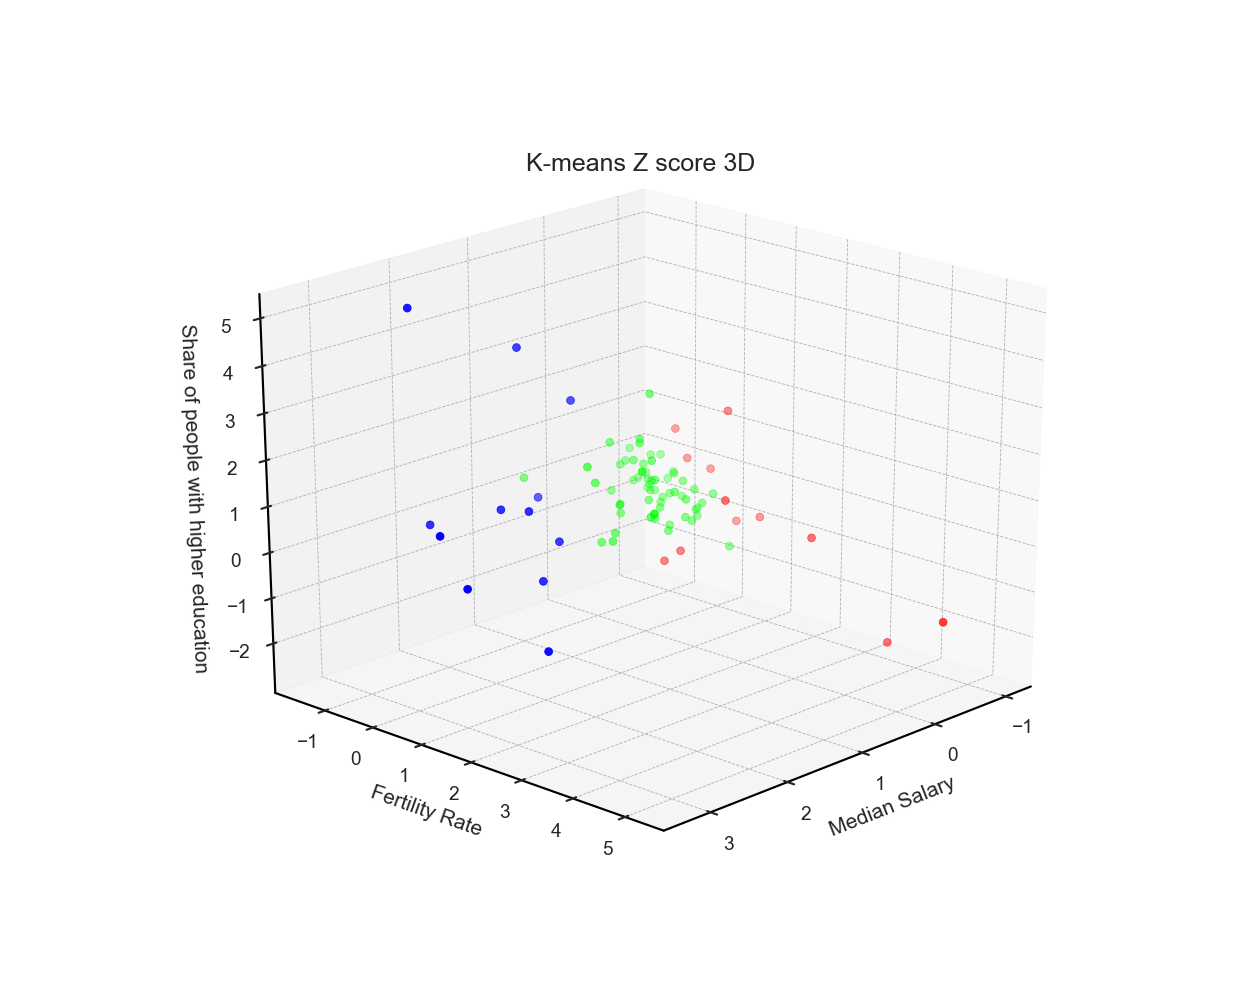

Text(0.5, 0.92, 'K-means Z score 3D')

In [4]:
#k-means Z score 3D

f = plt.figure()
ax = f.add_subplot(111, projection = '3d')
ax.scatter(new_df.iloc[:,1].to_numpy(), new_df.iloc[:,8].to_numpy(),new_df.iloc[:,0].to_numpy(), c = labels, s=20, cmap='brg')
ax.set_xlabel('Median Salary')
ax.set_ylabel('Fertility Rate')
ax.set_zlabel('Share of people with higher education')
ax.set_title('K-means Z score 3D')
#plt.savefig('kmeans_zscore_3d.png')

In [5]:
print(labels)

[2 1 2 2 2 2 2 2 2 1 1 2 0 2 2 1 1 2 2 1 1 2 1 2 0 1 2 2 2 2 0 2 2 2 2 2 2
 2 2 2 0 2 2 0 0 0 0 2 1 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 2 2 2 2
 2 1 2 2 2 2 2 2 0 2 1]


In [6]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

,Regions,Population вensity per km2,Total population,Total population per 1k,"Regions, rus",Share of people with higher education. 2010. %,Median salary. 2019. rubles,Unemployment rate. 2017. %,Share of poor people. 2017. %,Gross regional product per capita. 2016. rubles,Terrorist_crimes_2017,Murders and attempted murders. 2017,Criminal possesion of weapons. 2017,Fertility rate. 2017,Museum attendance. 2010. per pop,"Share of people using internet everyday, 2016, %"
0,Adygea Republic,59.43,463088,463.088,Адыгея,20,23943,0.662200,-0.403720,-0.406045,0.666328,-1.005976,-0.721945,-0.525684,-0.671459,-0.608674
1,Altai Republic,2.37,220140,220.140,Республика Алтай,18,24872,1.558311,1.754531,-0.389762,-0.037921,1.915292,2.026849,2.370446,-0.710915,-0.727464
2,Altai region,13.79,2317153,2317.153,Алтайский край,17,23480,0.130134,0.441595,-0.395884,-0.417132,-0.255372,0.036802,-0.111951,-0.698906,-0.225883
3,Amurskaya Oblast,2.18,790044,790.044,Амурская область,18,40376,-0.149901,-0.079982,-0.197114,-0.362959,1.245835,1.767278,0.129393,0.103938,-0.113329
4,Arkhangelsk region,2.64,1092424,1092.424,Архангельская область,17,41030,0.018120,-0.223866,-0.167919,-0.335873,1.489274,-0.495652,-0.077474,0.527661,1.140847
5,Astrakhan region,20.52,1005782,1005.782,Астраханская область,18,26001,0.298155,0.351668,-0.230178,0.314204,-0.539384,-0.921615,0.198348,-0.491333,-0.040283
6,Bashkortostan Republic,28.25,4038151,4038.151,Башкортостан,17,30176,-0.233911,-0.547603,-0.233236,-0.119181,-0.011933,-0.668700,0.094915,-0.654304,-0.184071
7,Belgorod region,57.09,1549151,1549.151,Белгородская область,21,29766,-0.709971,-1.338962,-0.042614,-0.390046,-0.742250,-0.648733,-0.973895,0.112515,-0.972998
8,Bryansk region,34.21,1192491,1192.491,Брянская область,18,24571,-0.569953,-0.367749,-0.364339,-0.390046,-0.640817,0.003524,-0.835984,0.328666,-1.410996
9,Buryatia Republic,2.81,985937,985.937,Бурятия,21,31260,0.886228,0.567493,-0.405399,-0.417132,4.390255,0.649124,1.336114,-0.302631,-0.295280


In [11]:
df.to_csv('labels.csv')

In [7]:
df['labels'] = labels
df.groupby('labels').mean()

,Population вensity per km2,Total population,Total population per 1k,Share of people with higher education. 2010. %,Median salary. 2019. rubles,Unemployment rate. 2017. %,Share of poor people. 2017. %,Gross regional product per capita. 2016. rubles,Terrorist_crimes_2017,Murders and attempted murders. 2017,Criminal possesion of weapons. 2017,Fertility rate. 2017,Museum attendance. 2010. per pop,"Share of people using internet everyday, 2016, %"
labels,,,,,,,,,,,,,,
0,748.969167,2.561279e+06,2561.278917,25.000000,62474.250000,-0.555951,-0.648022,1.541223,-0.263642,0.358297,0.084501,0.454058,0.521514,1.509511
1,43.565000,8.458300e+05,845.830000,18.166667,24837.250000,1.878018,1.556692,-0.429212,1.573727,0.630475,1.471655,1.137867,-0.663739,-0.137616
2,35.906721,1.742874e+06,1742.873639,19.672131,29913.229508,-0.260079,-0.178755,-0.218756,-0.257722,-0.194513,-0.306129,-0.313166,0.027979,-0.269881
